# 4-9. 프로젝트 : 주식 예측에 도전해 보자

## 패키지 임포트하기

In [1]:
import pandas
import sklearn
import statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
dataset_path = os.getenv('HOME')+'/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_path)
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
1,2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2,2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
3,2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
4,2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284
5,2020-05-25,48750.0,48900.0,48450.0,48850.0,46836.773438,14337913
6,2020-05-26,48700.0,49450.0,48600.0,49250.0,47220.289063,15127490
7,2020-05-27,48950.0,50000.0,48800.0,49900.0,47843.500000,19548479
8,2020-05-28,51100.0,51200.0,49900.0,50400.0,48322.898438,31309318
9,2020-05-29,50000.0,50700.0,49700.0,50700.0,48610.531250,27596961


# STEP 1 : 시계열 데이터 준비  
## Date 컬럼을 인덱스로 지정 후 예측에 쓸 Close 컬럼을 시리즈로 생성

Close 컬럼은 시리즈 타입이다.

In [4]:
type(df.Close)

pandas.core.series.Series

In [5]:
df = pd.read_csv(dataset_path, index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284
...,...,...,...,...,...,...
2021-05-12,80800.0,81200.0,79800.0,80000.0,80000.000000,35812268
2021-05-13,78900.0,79600.0,78400.0,78500.0,78500.000000,31490096
2021-05-14,79000.0,80300.0,78900.0,80100.0,80100.000000,16450920


In [6]:
ts = df.Close
print(ts.shape)
print(type(ts))
ts.head(10)

(250,)
<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
2020-05-25    48850.0
2020-05-26    49250.0
2020-05-27    49900.0
2020-05-28    50400.0
2020-05-29    50700.0
Name: Close, dtype: float64

### 시계열 데이터 ts를 시각화해보기

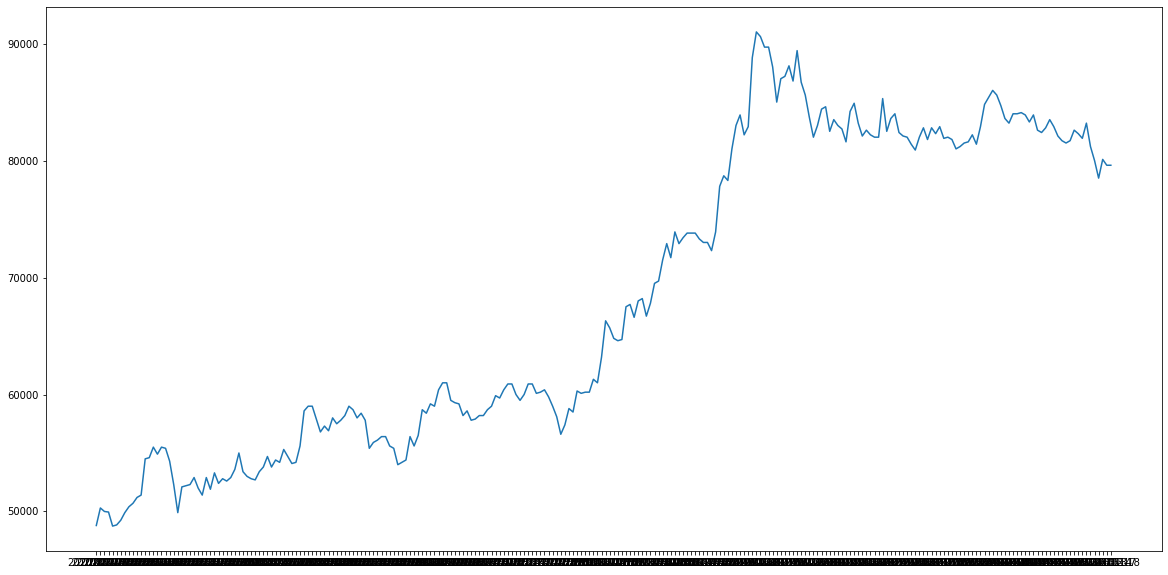

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

plt.plot(ts)

x축 상태가 좋지않아보인다.. 데이터가 많다

## 결측치 확인 및 로그변환

결측치 없음!

In [8]:
print(ts.isna().sum())
ts[ts.isna()]

0


Series([], Name: Close, dtype: float64)

### 로그함수화 전 원본 데이터로 보는 이동평균, 이동표준편차를 확인하고 시각화

In [9]:
def plot_rolling_statistics(timeseries, window=7):
    
    rolmean = timeseries.rolling(window=window).mean()      # 이동평균
    rolstd = timeseries.rolling(window=window).std()        # 이동표준편차
    
    # 시각화
    org = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Original Data Rolling Mean & Standard Deviation')
    plt.show(block=False)              

### window를 7로 설정해보았을 경우 (일주일이 7일이니까)

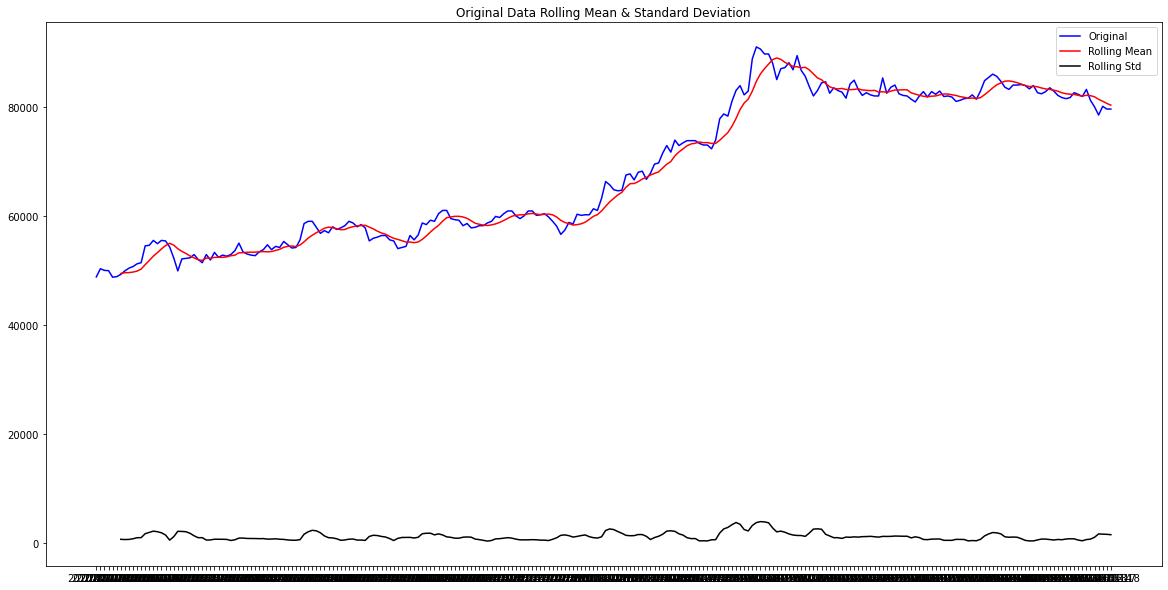

In [10]:
plot_rolling_statistics(ts, window=7)

### window를 14로 설정해보았을 경우 (2주 간격)

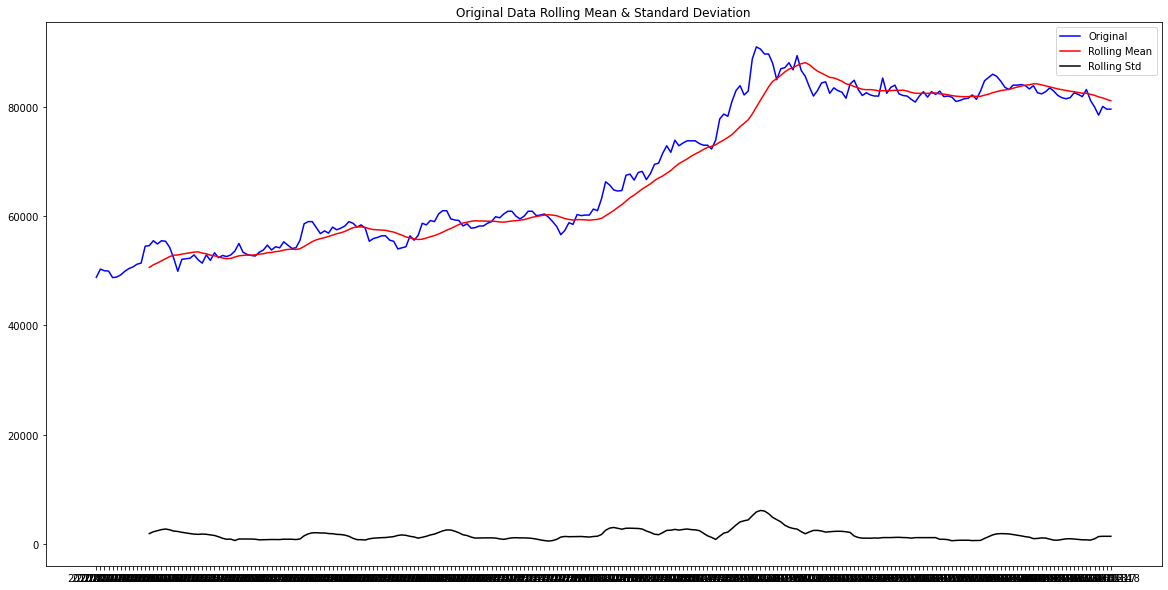

In [11]:
plot_rolling_statistics(ts, window=14)

### window를 28으로 설정해보았을 경우 (4주 간격)

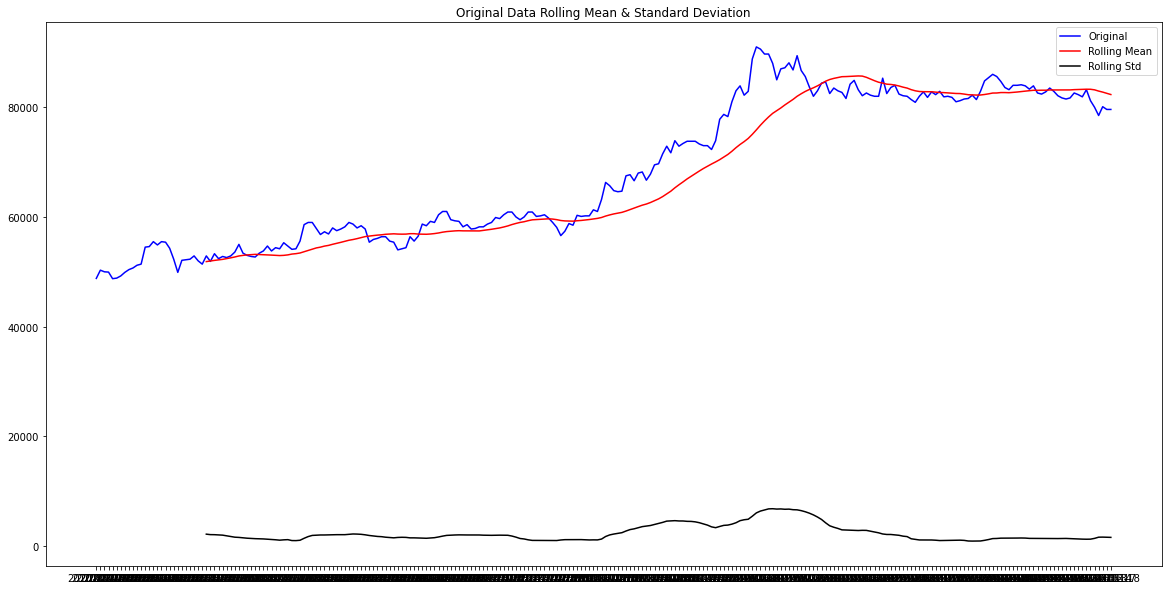

In [12]:
plot_rolling_statistics(ts, window=28)

음 차이가 있긴한데 어떤 차이인지는 잘 모르겠다  
눈에 보이는 차이점으로는 window size가 커질 경우 추세의 최고점이 점점 낮아진 정도  
또한 window size를 키울때마다 그래프 앞부분에 이동평균값과 이동표준편차값의 결측치가 생겨 약간의 공백이 생기는걸 확인할 수 있었다.

## 진짜 로그함수화

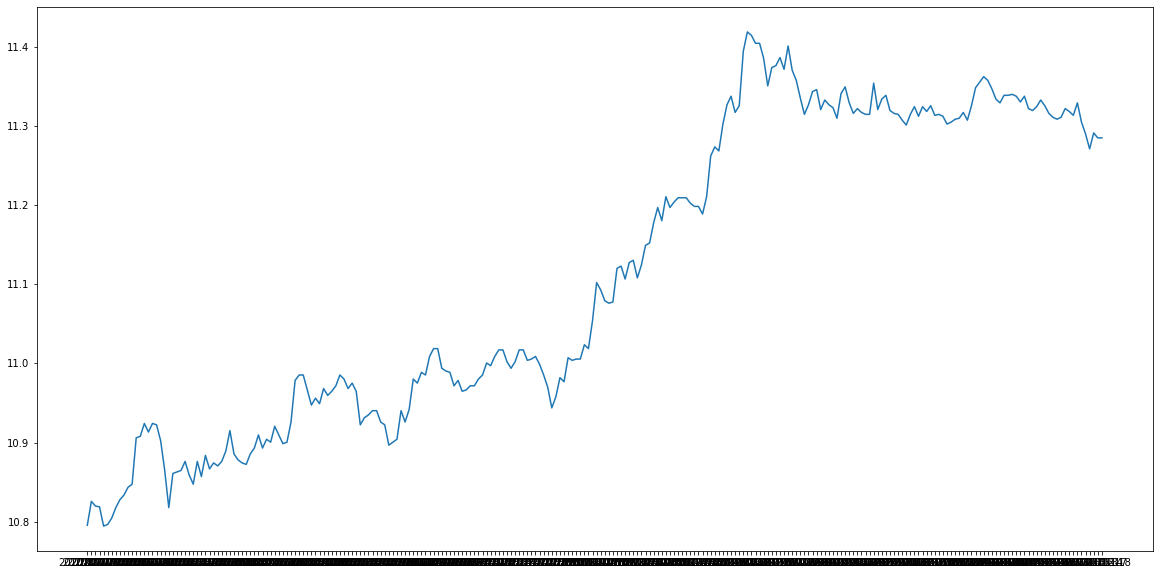

In [13]:
ts_log = np.log(ts)
plt.plot(ts_log)

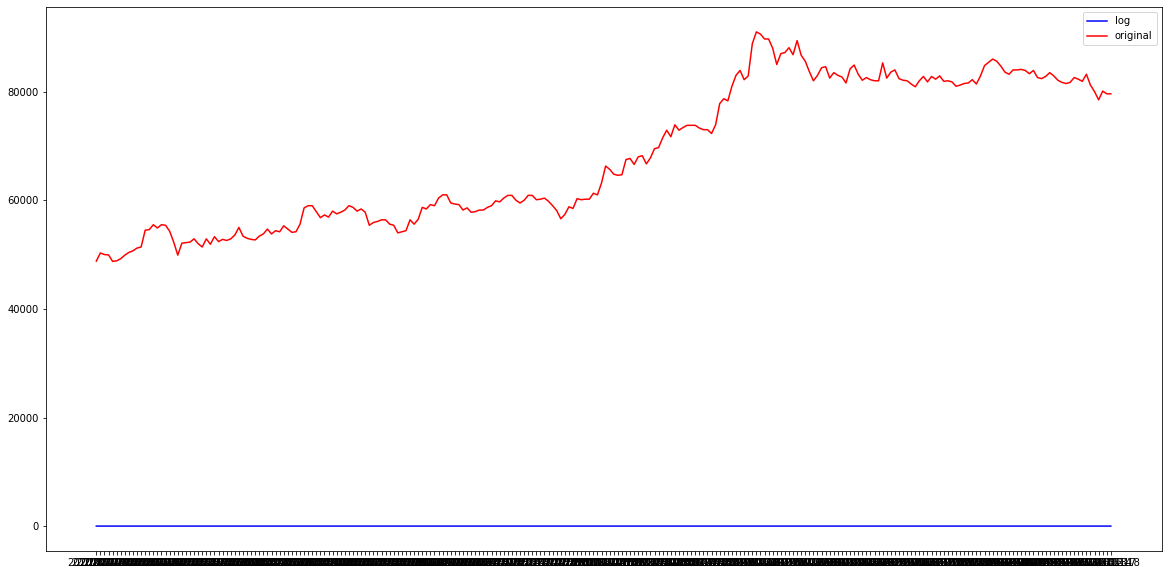

In [14]:
plt.plot(ts_log, color='blue', label='log')
plt.plot(ts, color='red', label='original')
plt.legend()
plt.show()

### 그렇다 모양은 비슷해도 로그함수화 시킨것은 바닥에 껌딱지마냥 붙어있다.

### 그러면 로그화시킨 함수도 이동평균값과 이동표준편차값을 시각화해보자

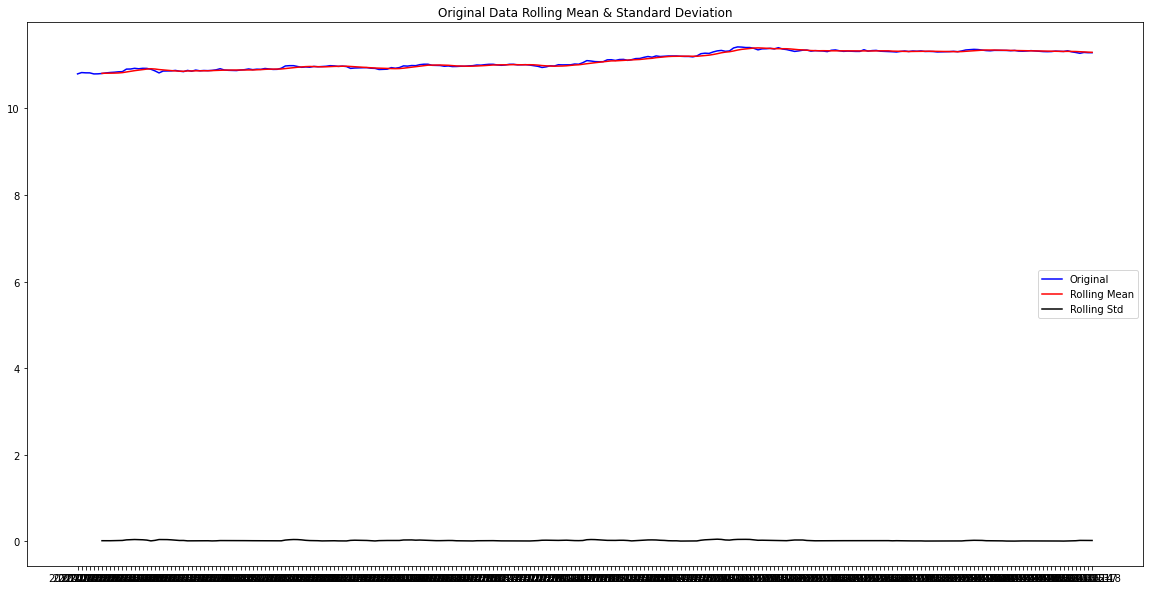

In [15]:
plot_rolling_statistics(ts_log, window=7)

### ?

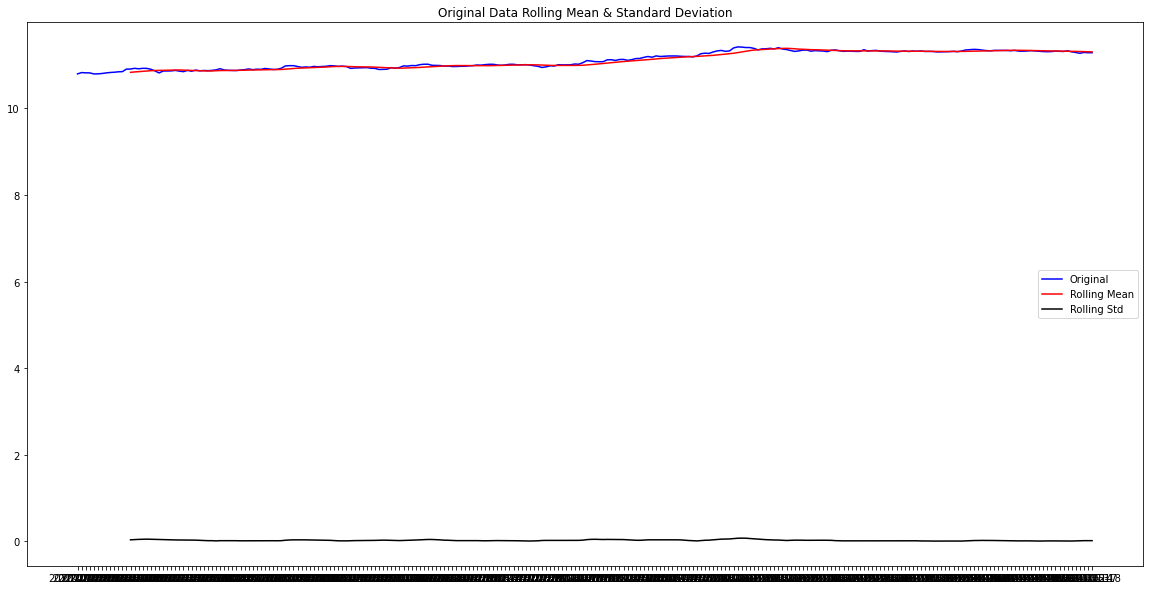

In [16]:
plot_rolling_statistics(ts_log, window=14)

### ??

## 일단 ADF 검정을 통해 얼마나 이쁜 데이터인지 확인해보자  
ADF 검정 식 생성

In [17]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Cretical Value (%s)' % key] = value
    print(dfoutput)

원본 데이터에 대한 ADF 검정

In [18]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.222649
p-value                          0.663778
#Lags Used                       0.000000
Number of Observations Used    249.000000
Cretical Value (1%)             -3.456888
Cretical Value (5%)             -2.873219
Cretical Value (10%)            -2.572994
dtype: float64


p-value가 0.66정도가 나왔으므로 원본 데이터는 예쁜 데이터는 아니였다  
  
다음 로그함수화 시킨 ts_log 데이터에 대한 ADF 검정

In [19]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Cretical Value (1%)             -3.456888
Cretical Value (5%)             -2.873219
Cretical Value (10%)            -2.572994
dtype: float64


p-value가 조금 낮아진 0.59로 확인되었다.  
아직 예뻐질려면 멀었다는 얘기

### 시계열 분해를 통해 Trend, Seasonality, Residuals 시각화  

seasonal_decompose 메소드를 이용할 수 있다.

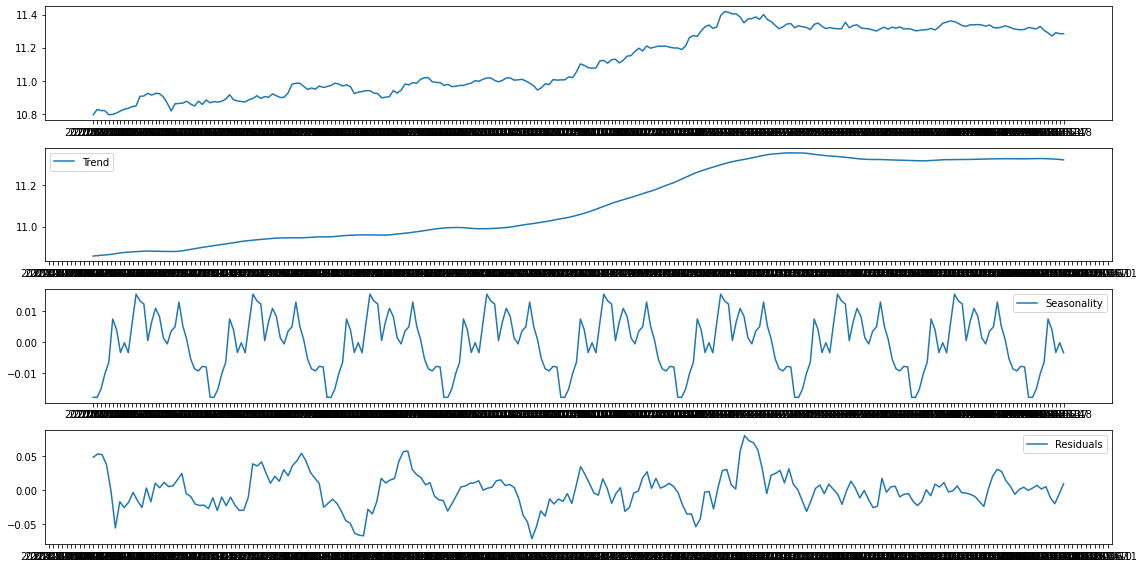

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, period = 30)

trend = decomposition.trend            # 추세
seasonal = decomposition.seasonal      # 계절성
residual = decomposition.resid         # 로그함수화값 - 추세 - 계절성

plt.rcParams['figure.figsize'] = (16,8)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### 잔차 데이터로 이동평균, 이동표준편차 함께 시각화해보기

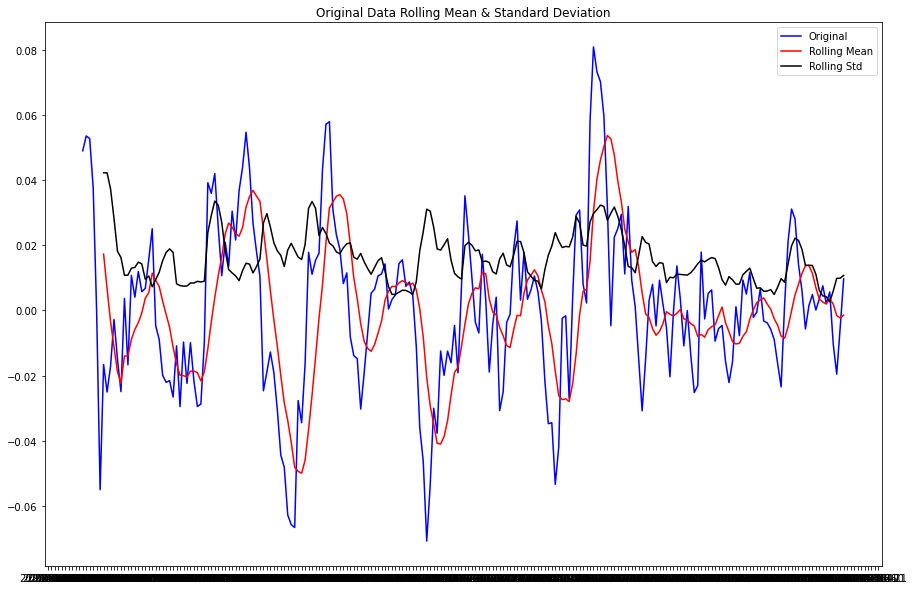

In [21]:
plt.rcParams["figure.figsize"] = (15,10)
plot_rolling_statistics(residual, 7)

### 결측치를 제거하고 FDA 검정

In [22]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.178662e+00
p-value                        6.535920e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Cretical Value (1%)           -3.461879e+00
Cretical Value (5%)           -2.875404e+00
Cretical Value (10%)          -2.574159e+00
dtype: float64


### p-value가 6.535920e-08로 매우매우매우매우 안정적인 데이터로 판별되었다

## 이제 ts_log 데이터를 훈련과 테스트로 나누어서 학습을 진행하고 오차값을 계산해보자  

train_data와 test_data를 9:1 비율로 슬라이스를 이용해 나누어준다.

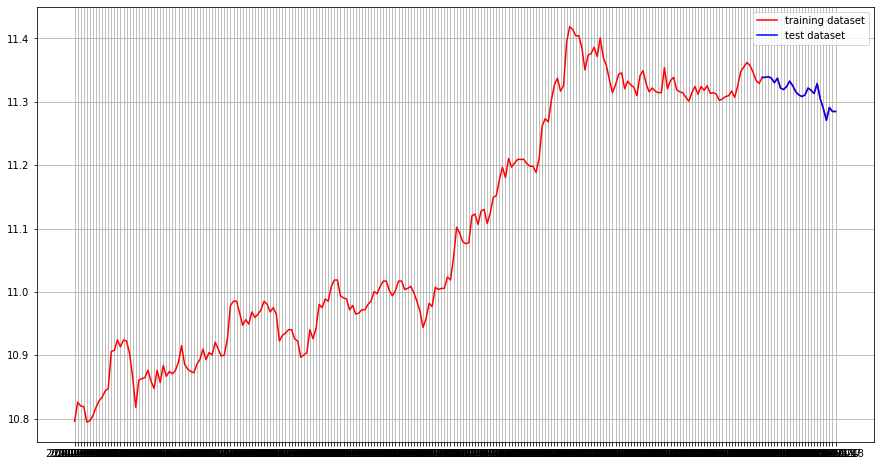

In [23]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## ARIMA 적정 모수찾기  

### ARIMA 모수값에 들어갈 p, q의 값을 추정해보기위해 ACF와 PACF를 시각화시켜보자

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


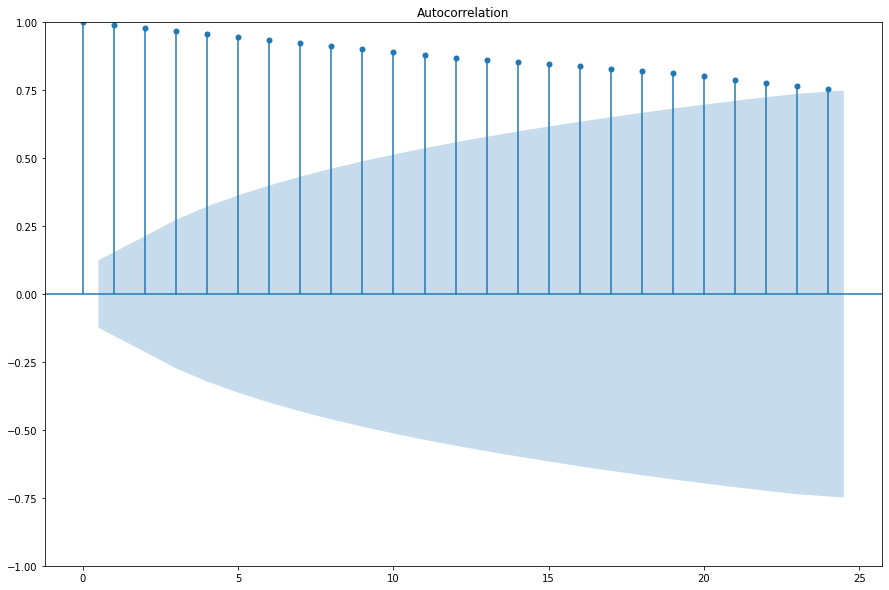

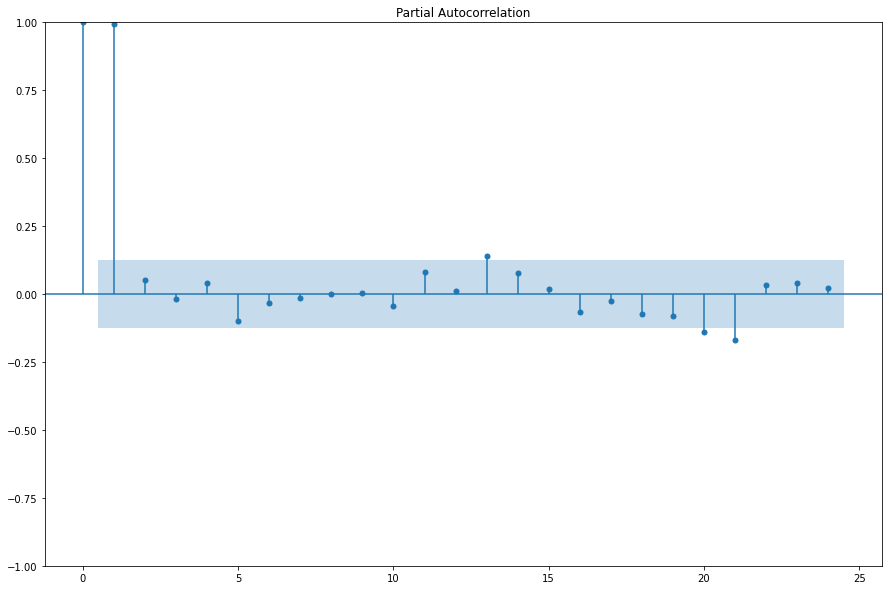

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

### q값을 결정지을 MA모델의 그래프를보니 감소하고있긴하나 0과 거리가 멀다  
### p값을 결정지을 AR모델의 그래프를 보니 1 이후로 0과 근접하는 모습으로 보인다.  
### q 값을 0으로 놓고 p 값을 손봐야할것같다.  
### 다음은 d 값을 구하기 위해 차분을 진행해보자

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Cretical Value (1%)           -3.456996e+00
Cretical Value (5%)           -2.873266e+00
Cretical Value (10%)          -2.573019e+00
dtype: float64


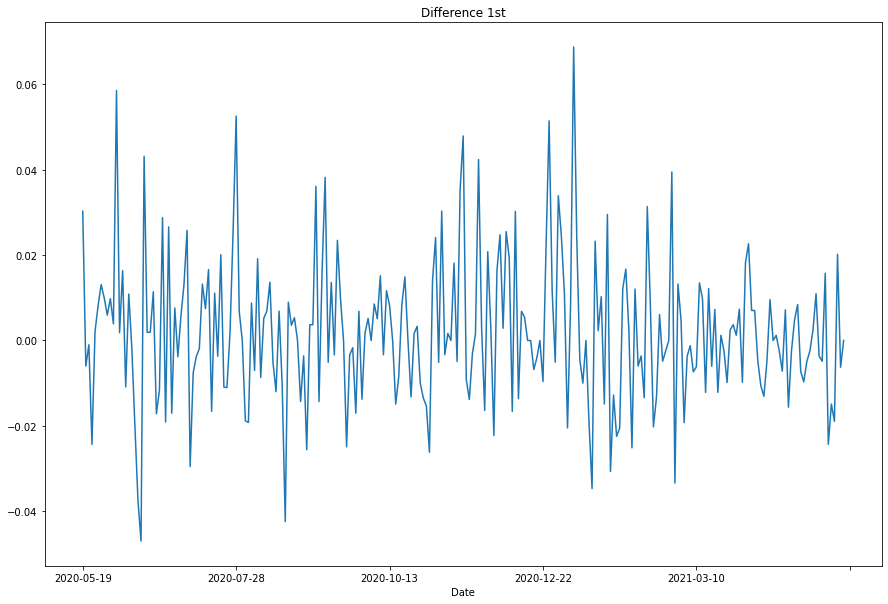

In [25]:
# d 값을 구하기 위해 차분 해보기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Cretical Value (1%)           -3.457894e+00
Cretical Value (5%)           -2.873659e+00
Cretical Value (10%)          -2.573229e+00
dtype: float64


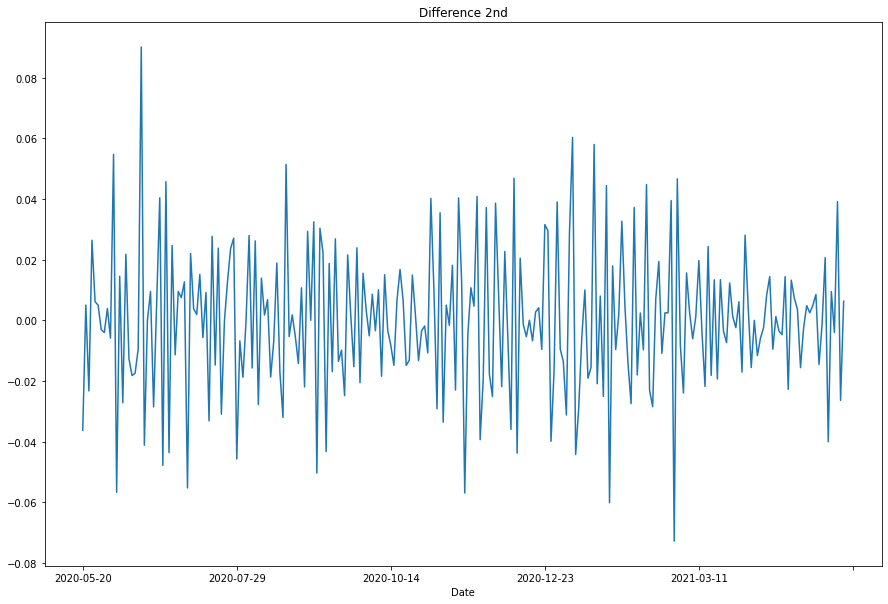

In [26]:
# 2차 차분 구하기   - 1차 차분한 값에 한번 더 차분해준다
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## ARIMA 모델 학습하기

In [27]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(50, 1, 0)) # p = 50 d = 1 q = 0 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                ARIMA(50, 1, 0)   Log Likelihood                 597.609
Date:                Mon, 21 Nov 2022   AIC                          -1093.217
Time:                        09:19:17   BIC                           -919.223
Sample:                             0   HQIC                         -1022.985
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0381      0.082      0.467      0.641      -0.122       0.198
ar.L2          0.0105      0.098      0.107      0.915      -0.181       0.202
ar.L3         -0.0481      0.098     -0.492      0.6

### 훈련 결과 시각화

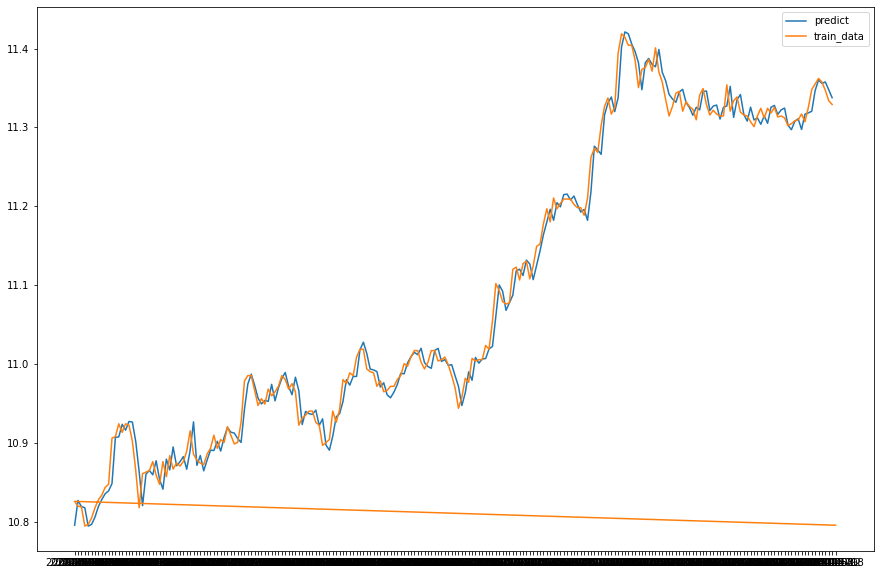

In [28]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

저 바닥에 있는 선은 뭘까요....?

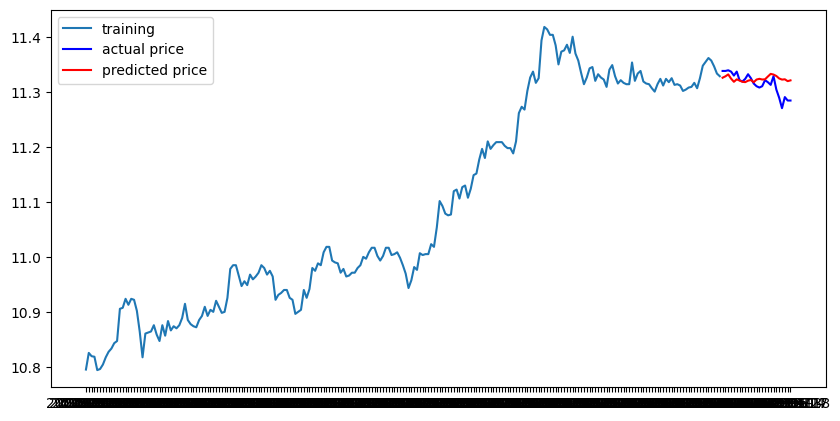

In [29]:
model = ARIMA(train_data, order=(50, 1, 0))  
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  
fc = np.array(fc)
fc_series = pd.Series(fc, index=test_data.index)   

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

ARIMA p값을 낮게 해보니 예측값이 직선으로 나오길래 값을 높여가며 수정해보았더니 어느 모양이 나오긴했다!

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2714861.161332556
MAE:  1256.5446603938594
RMSE:  1647.6835743954468
MAPE: 1.55%


### 예측 정확도가 왜 이모양,,,